# Projet sante publique france

## Déjà réalisé



## Analyses univariées

In [1]:
import os
import re
from pprint import pprint

from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
from tabulate import tabulate
import unicodedata
from wordcloud import WordCloud

from src.features.univar import UnivariateAnalysis
from src.visualization import visualize as viz

plt.rcdefaults()
font = {'size': 16}

sns.set()
plt.rc('font', **font)

In [2]:
pd.options.display.max_rows = 999

In [3]:
# On récupère les données du second traitement
data = pd.read_pickle('../data/interim/products_interimV2.pickle')
univar = UnivariateAnalysis(data)

In [4]:
for col in data.columns:
    print(col)

code
product_name
brands
pnns_groups_1
quantity
nutriscore_grade
main_category_en
energy_100g
proteins_100g
fat_100g
carbohydrates_100g
salt_100g
sodium_100g
saturated-fat_100g
sugars_100g
fiber_100g


In [5]:
data.shape

(105019, 16)

In [6]:
data['main_category_en'] = data['main_category_en'].astype('category')
data['nutriscore_grade'] = data['nutriscore_grade'].astype(pd.CategoricalDtype(ordered=True))

In [7]:
data['nutriscore_grade']

3          d
305        b
325        b
346        c
374        b
          ..
1120420    d
1120453    e
1120673    e
1120721    e
1120743    d
Name: nutriscore_grade, Length: 105019, dtype: category
Categories (5, object): [a < b < c < d < e]

In [8]:
data.describe()

,energy_100g,proteins_100g,fat_100g,carbohydrates_100g,salt_100g,sodium_100g,saturated-fat_100g,sugars_100g,fiber_100g
count,105019.000000,105019.000000,105019.000000,105019.000000,105019.000000,105019.000000,105019.000000,105019.000000,105019.000000
mean,1144.165331,8.219896,14.590216,26.283483,0.962439,0.384969,5.706304,12.861861,1.420128
std,769.467363,7.965544,17.790085,26.558796,2.307346,0.922938,8.370257,18.529777,3.206173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000
25%,482.000000,2.200000,1.585000,3.300000,0.080000,0.032000,0.400000,0.900000,0.000000
50%,1046.000000,6.200000,8.000000,14.000000,0.600000,0.240000,2.200000,3.600000,0.000000
75%,1653.000000,11.900000,22.800000,51.000000,1.300000,0.520000,8.100000,17.000000,1.800000
max,3979.000000,100.000000,100.000000,100.000000,100.000000,40.000000,100.000000,100.000000,100.000000


In [9]:
data.head()

,code,product_name,brands,pnns_groups_1,quantity,nutriscore_grade,main_category_en,energy_100g,proteins_100g,fat_100g,carbohydrates_100g,salt_100g,sodium_100g,saturated-fat_100g,sugars_100g,fiber_100g
3,0000000000100,moutarde au moût de raisin,courte paille,Fat and sauces,"(100.0, g)",d,Groceries,936.0,5.1,8.2,29.0,4.60,1.811024,2.2,22.0,0.0
305,0000000274739,Raviolini au Fromage de chèvre et Pesto,Comme J’Aime,Composite foods,"(300.0, g)",b,Meals,455.0,4.4,4.2,12.5,0.60,0.240000,2.1,1.4,1.8
325,0000000491228,Entremets Crème Brulée,Comme J'aime,Milk and dairy products,"(20.0, g)",b,Dairies,1952.4,6.8,15.3,75.5,0.50,0.200000,11.2,69.8,0.1
346,00000024,Pommes séchées,Kazidomi,Fruits and vegetables,"(125.0, g)",c,Plant-based foods and beverages,1222.0,2.0,0.5,65.0,0.03,0.012000,0.1,51.0,0.0
374,0000009125124,Compote de Pomme,MX3,Fruits and vegetables,"(40.0, g)",b,Plant-based foods and beverages,1577.0,1.5,0.5,93.0,0.02,0.008000,0.1,66.0,0.0


### Catégories

In [10]:
data['main_category_en'].value_counts()

Plant-based foods and beverages                                              26018
Snacks                                                                       18710
Dairies                                                                      12340
Meats                                                                         8913
Meals                                                                         6781
Beverages                                                                     5353
Groceries                                                                     5023
Frozen foods                                                                  3209
Seafood                                                                       2528
Fruit juices                                                                  2307
Desserts                                                                      2193
Canned foods                                                                  2097
Spre

### Nutriscore et nutrigrade

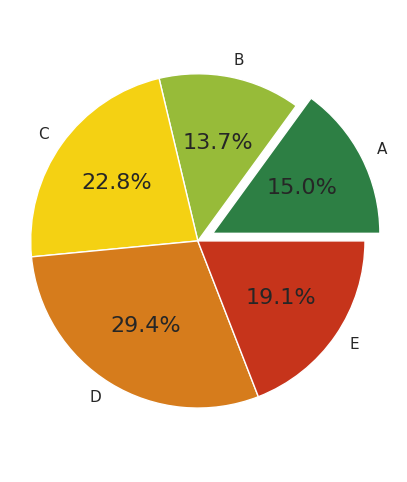

In [11]:
nutscore = ["#2D7F44", "#97BB39", "#F4D113", "#D67C1C", "#C6341B"]

g = viz.RepartitionPlot(data=data, var='nutriscore_grade',
                        plot_type='pie')
g.plot(colors=nutscore, explode=(0.1, 0, 0, 0, 0),
       autopct='%1.1f%%',)

### Valeurs _100g

Energie, protéines, graisse, sucres

energy_100g
completion rate -- energy_100g : 100.0 %


mean,std,min,max,median,variance,25%,75%
1144.1653307782403,769.4673629093281,0.0,3979.0,1046.0,592080.0225826357,482.0,1653.0


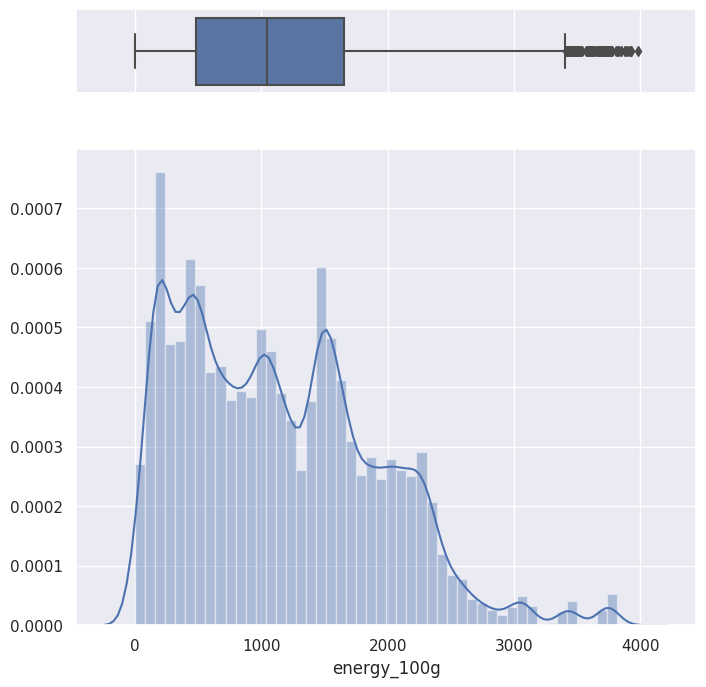

proteins_100g
completion rate -- proteins_100g : 100.0 %


mean,std,min,max,median,variance,25%,75%
8.219896294510622,7.965543995253866,0.0,100.0,6.2,63.44989114032492,2.2,11.9


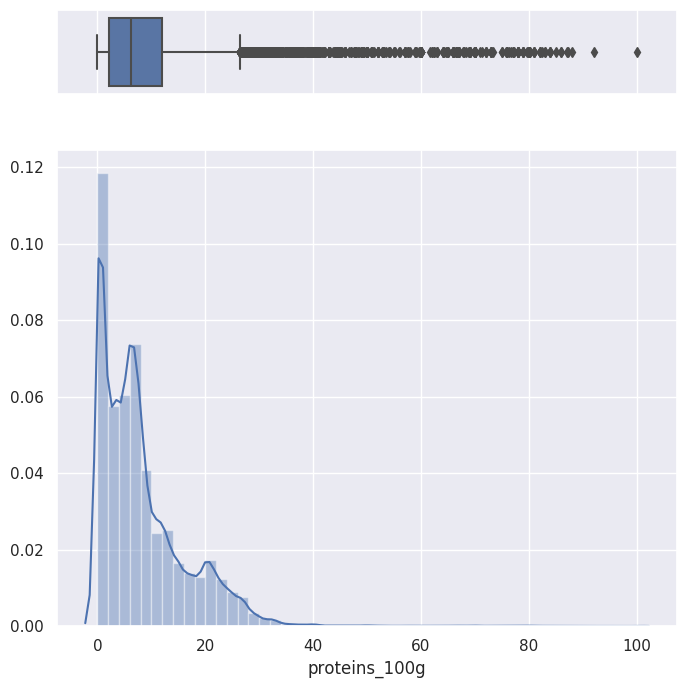

fat_100g
completion rate -- fat_100g : 100.0 %


mean,std,min,max,median,variance,25%,75%
14.59021634870574,17.790085469113027,0.0,100.0,8.0,316.48714099834643,1.585,22.8


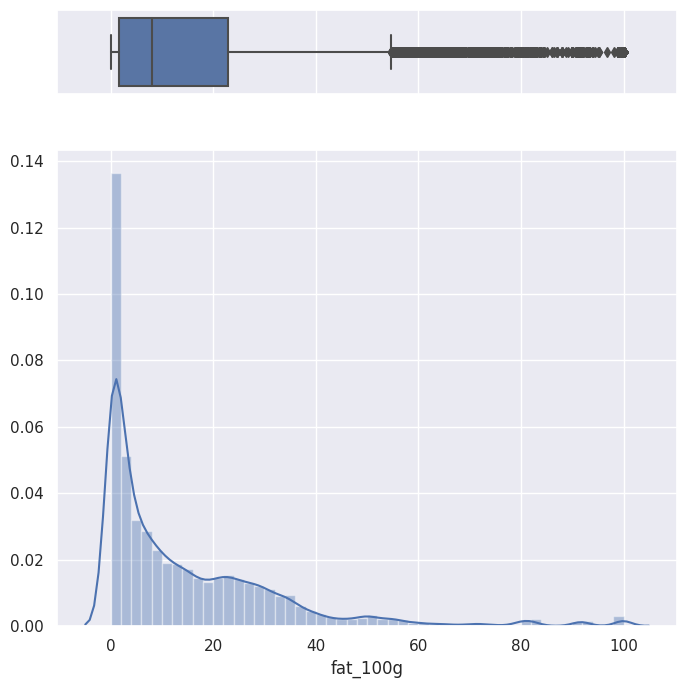

carbohydrates_100g
completion rate -- carbohydrates_100g : 100.0 %


mean,std,min,max,median,variance,25%,75%
26.283483290953377,26.55879614015153,0.0,100.0,14.0,705.3696524141277,3.3,51.0


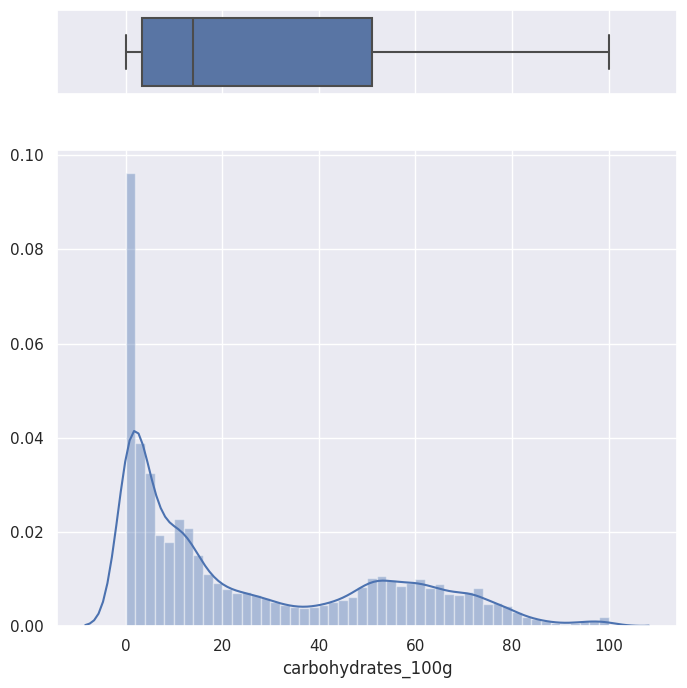

salt_100g
completion rate -- salt_100g : 100.0 %


mean,std,min,max,median,variance,25%,75%
0.9624387344906222,2.3073456021950025,0.0,100.0,0.6,5.323843727968619,0.08,1.3


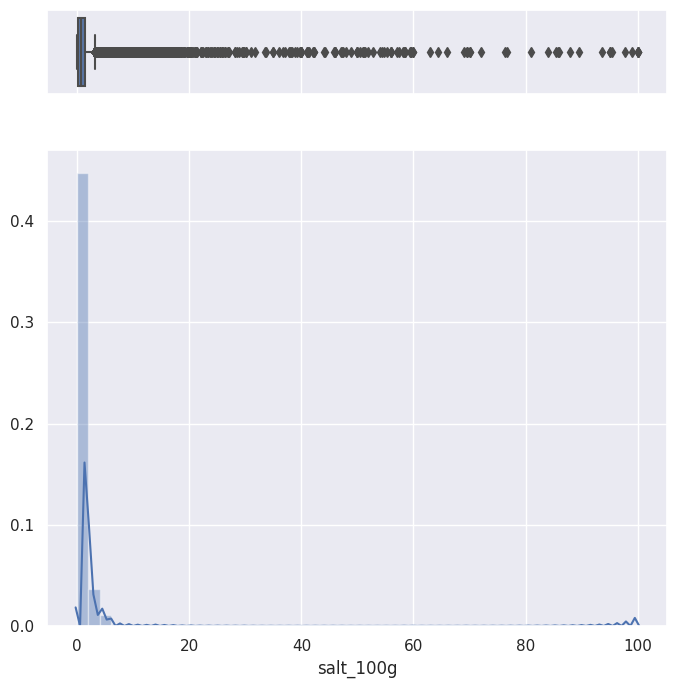

sodium_100g
completion rate -- sodium_100g : 100.0 %


mean,std,min,max,median,variance,25%,75%
0.3849693098656546,0.9229375215637667,0.0,40.0,0.24,0.8518136687102683,0.032,0.52


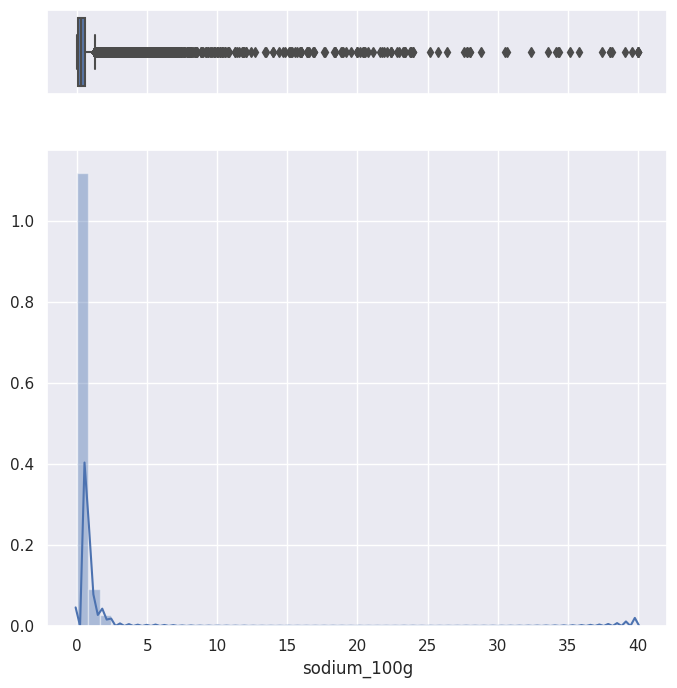

saturated-fat_100g
completion rate -- saturated-fat_100g : 100.0 %


mean,std,min,max,median,variance,25%,75%
5.706303860086381,8.370257002712155,0.0,100.0,2.2,70.06120229145186,0.4,8.1


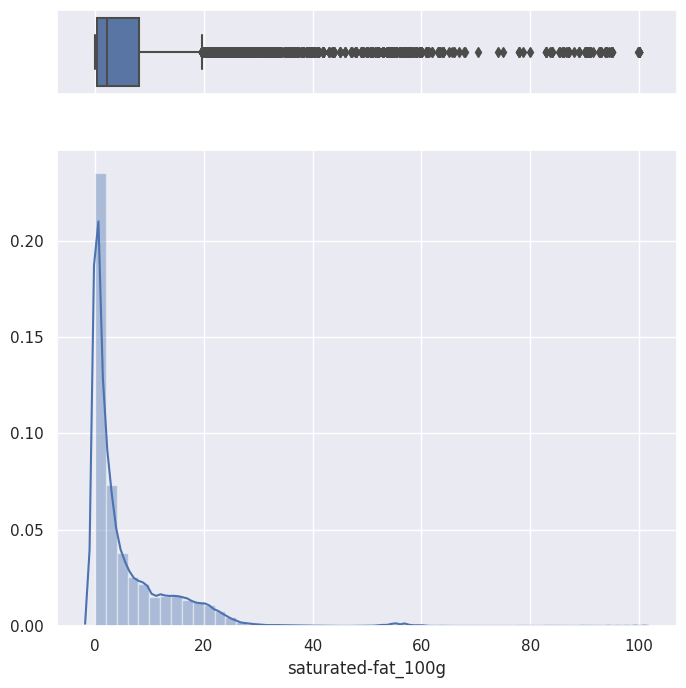

sugars_100g
completion rate -- sugars_100g : 100.0 %


mean,std,min,max,median,variance,25%,75%
12.861861113361014,18.52977654190706,-0.1,100.0,3.6,343.3526186930092,0.9,17.0


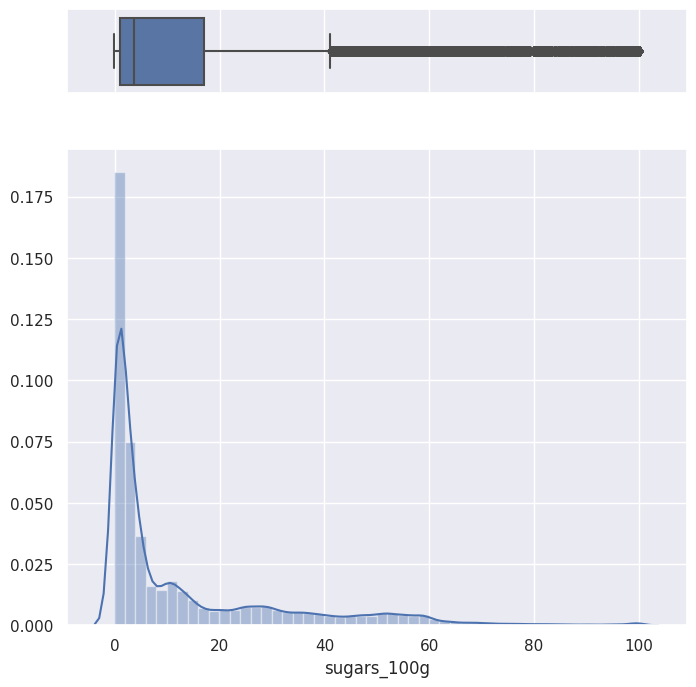

fiber_100g
completion rate -- fiber_100g : 100.0 %


mean,std,min,max,median,variance,25%,75%
1.420128280025519,3.2061728108167116,0.0,100.0,0.0,10.279544092820332,0.0,1.8


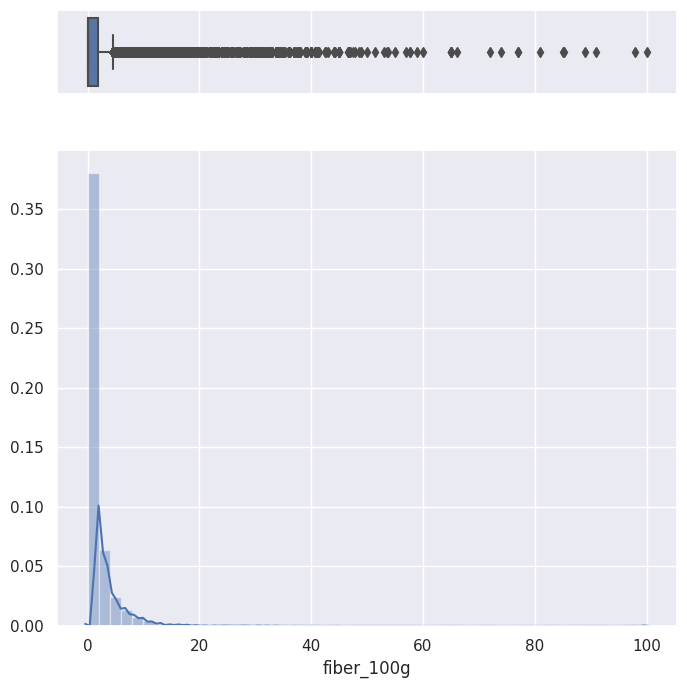

In [12]:
for col in data.columns:
    if col.endswith('_100g'):
        print(col)
        univar.make_analysis(col)

### Marques

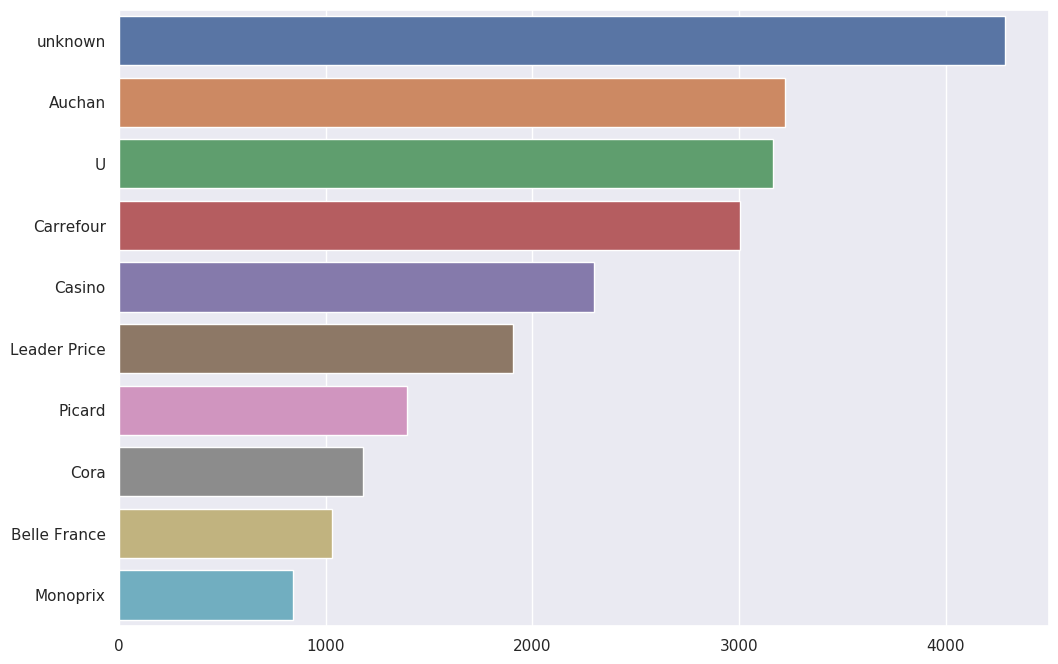

In [13]:
g = viz.RepartitionPlot(data=data, var='brands', plot_type='bar')
g.plot(others_cat=False, orient='h')

## Bivariées

In [14]:
# TODO: stacked-bar, hue is hardcoded for now

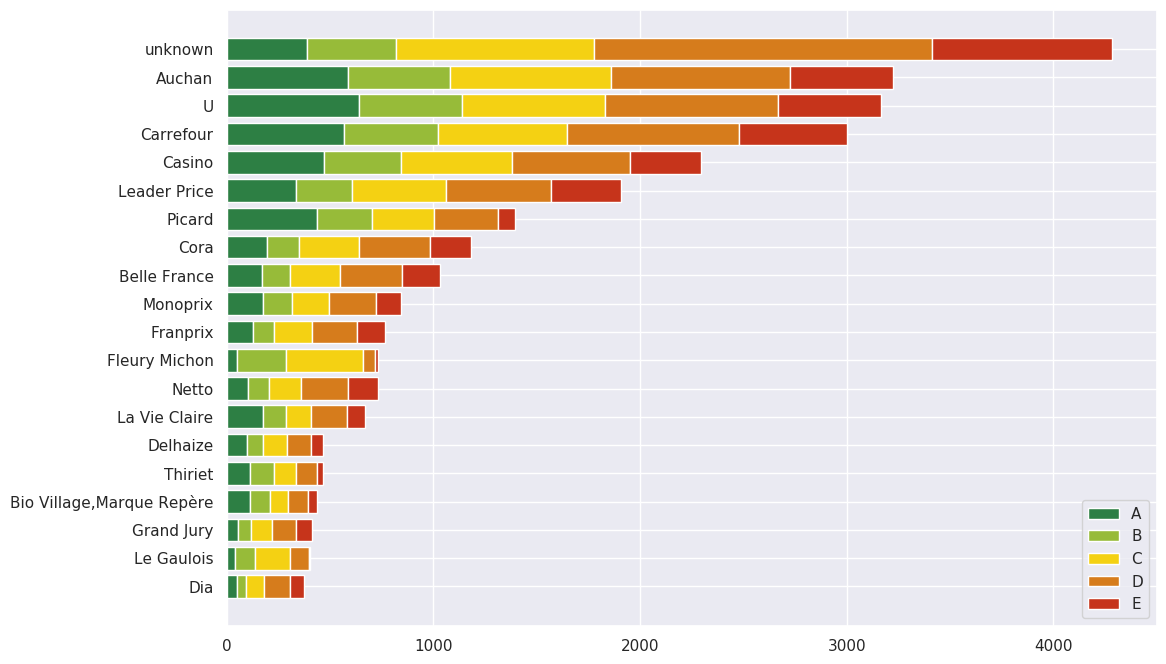

In [21]:
g = viz.RepartitionPlot(data=data, var='brands',
                        plot_type='stacked-bar', max_class=20)
g.plot(others_cat=False, colors=nutscore)

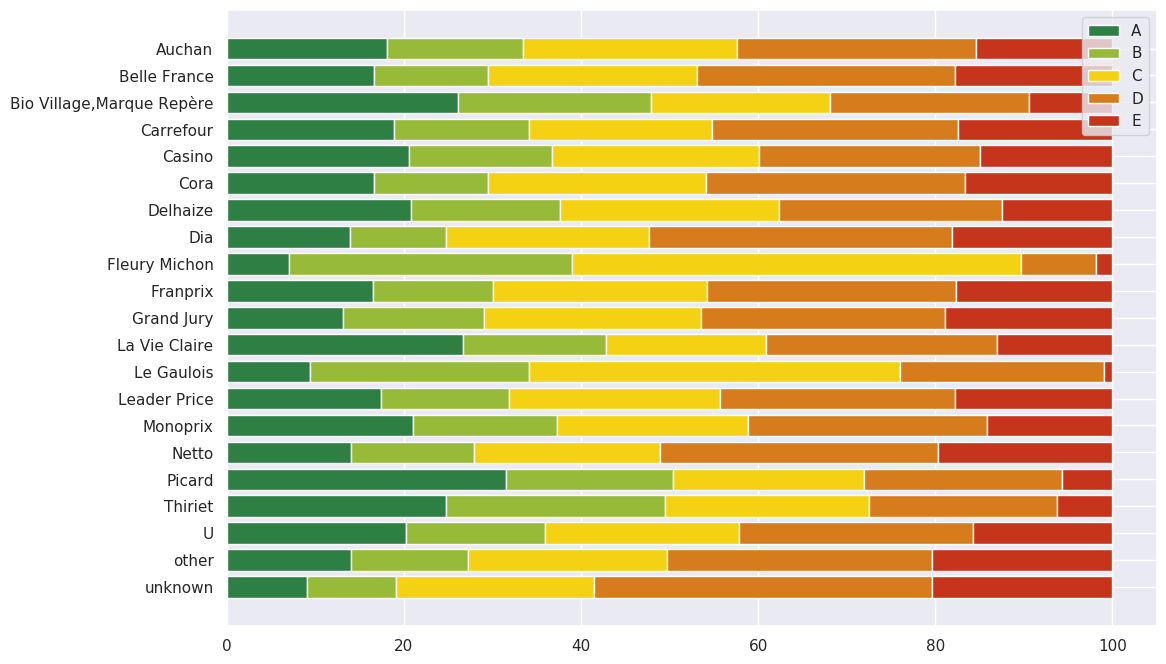

In [22]:
g = viz.RepartitionPlot(data=data, var='brands', plot_type='stacked-bar',
                        max_class=20)
g.plot(others_cat=True, colors=nutscore, frequency=True,
       sort='labels', ascending=False)

### PNNS groups

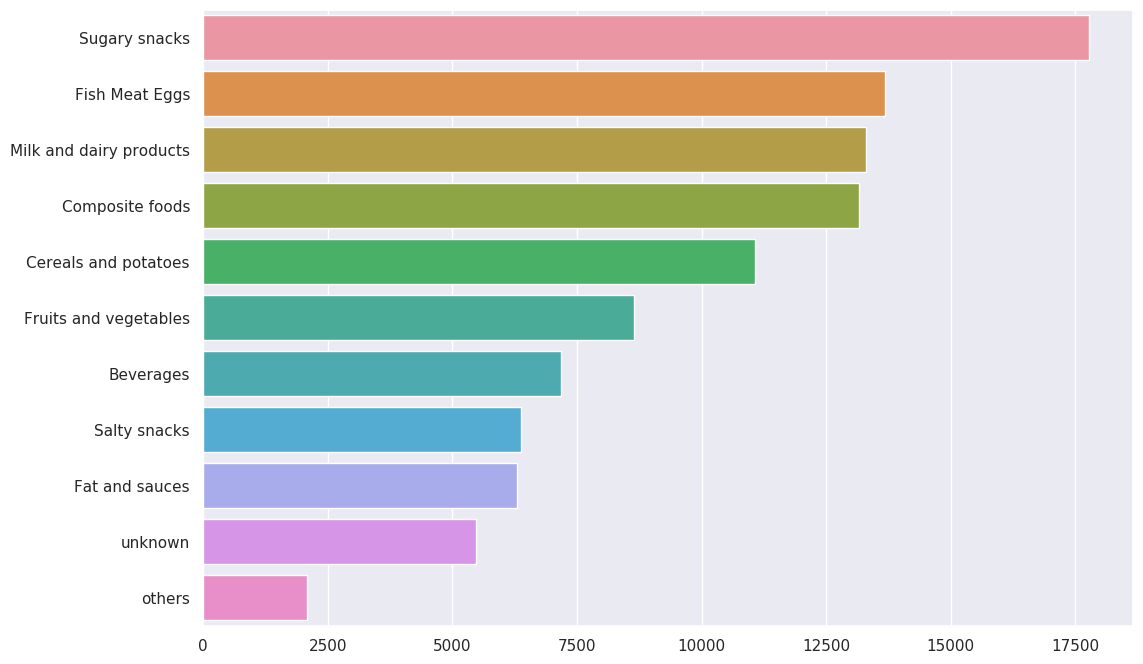

In [17]:
g = viz.RepartitionPlot(data=data, var='pnns_groups_1',
                        plot_type='bar')
g.plot(orient='h')

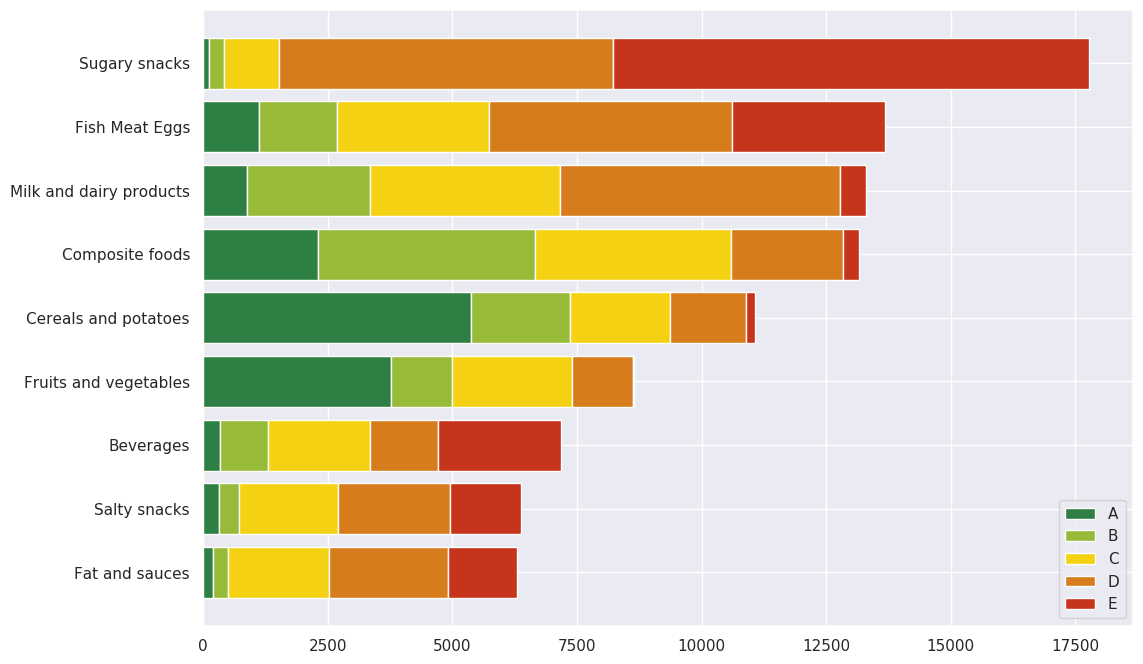

In [18]:
g = viz.RepartitionPlot(data=data, var='pnns_groups_1',
                        plot_type='stacked-bar', max_class=9)
g.plot(others_cat=False, orient='h', colors=nutscore)

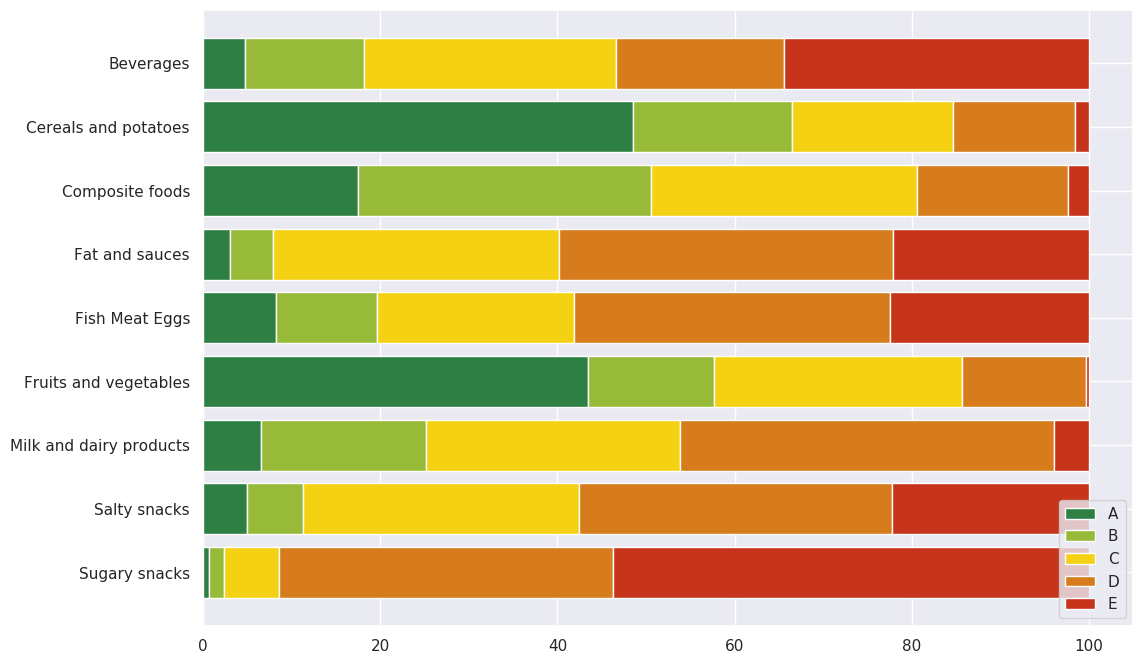

In [19]:
g = viz.RepartitionPlot(data=data, var='pnns_groups_1',
                        plot_type='stacked-bar', max_class=9)
g.plot(orient='h', colors=nutscore, others_cat=False, frequency=True,
       sort='labels', ascending=False)

Version control

In [20]:
!git commit ./3.0-tg-uni-bi-variate-analysis.ipynb -m "Automatic commit"

[master 2833a49] Automatic commit
 1 file changed, 1332 insertions(+), 7677 deletions(-)
 rewrite notebooks/3.0-tg-uni-bi-variate-analysis.ipynb (88%)
